In [1]:
import requests
from bs4 import BeautifulSoup
import urllib.request
import pandas as pd

In [2]:
r = requests.get('https://m.rbi.org.in/Scripts/PublicationsView.aspx?id=20003')
print(r.content)

b'\r\n<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">\r\n<html xmlns="http://www.w3.org/1999/xhtml">\r\n<head>\r\n    <meta http-equiv="Content-Type" content="text/html; charset=utf-8" />\r\n    <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1" />\r\n    <title>Reserve Bank of India - Publications</title>\r\n    <meta name="description" content="" />\r\n    <meta name="author" content="" />\r\n    <meta name="viewport" content="width=device-width" />\r\n    <script type="text/javascript" src="/js/libs/modernizr-2.5.3.min.js"></script>\r\n    <style type="text/css">\r\n        table.tablebg tbody tr td center table tbody tr td\r\n        {\r\n            border: 0 !important;\r\n        }\r\n    </style>\r\n</head>\r\n<body>\r\n    <form method="post" action="./PublicationsView.aspx?id=20003" id="Form1">\r\n<input type="hidden" name="__VIEWSTATE" id="__VIEWSTATE" value="/wEPDwUKLTI3MTMzMzM4OWRkP2gB725k

In [3]:
soup = BeautifulSoup(r.content, 'html.parser')
print(soup.prettify())

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<html xmlns="http://www.w3.org/1999/xhtml">
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
  <title>
   Reserve Bank of India - Publications
  </title>
  <meta content="" name="description"/>
  <meta content="" name="author"/>
  <meta content="width=device-width" name="viewport"/>
  <script src="/js/libs/modernizr-2.5.3.min.js" type="text/javascript">
  </script>
  <style type="text/css">
   table.tablebg tbody tr td center table tbody tr td
        {
            border: 0 !important;
        }
  </style>
 </head>
 <body>
  <form action="./PublicationsView.aspx?id=20003" id="Form1" method="post">
   <input id="__VIEWSTATE" name="__VIEWSTATE" type="hidden" value="/wEPDwUKLTI3MTMzMzM4OWRkP2gB725kUXgBLHXtE+8o++u3q+NSqYUDMY1MyfaVTfM="/>
   <input id="__VIEWSTATEGENERATOR" n

In [4]:
soup = BeautifulSoup(r.content, 'html.parser')
data = []
table = soup.find('table', attrs={'class':'lineItemsTable'})


rows = soup.find_all('tr')
for row in rows:
    cols = row.find_all('td')
    cols = [ele.text.strip() for ele in cols]
    data.append([ele for ele in cols if ele])

In [5]:
data[6]

['No. of Persons', 'Percentage', 'No. of Persons', 'Percentage']

In [6]:
pov_df = pd.DataFrame(columns=['State_Name', 'Poverty'])
dic={}
itr=47
lenn=len(data)
print(lenn)
#for i in range(5)
while itr<47+35:
    lis=[]
    lis.append(data[itr][0].upper())
    lis.append(float(data[itr][6]))
    pov_df.loc[len(pov_df)]=lis
    dic[data[itr][0].upper()]=float(data[itr][6])
    itr+=1
pov_df.loc[28,"State_Name"]="ANDAMAN & NICOBAR ISLANDS"
pov_df.loc[9,"State_Name"]="JAMMU & KASHMIR"
pov_df.loc[31,"State_Name"]="NCT OF DELHI"
dic["NCT OF DELHI"]=dic["DELHI"]
dic["JAMMU & KASHMIR"]=dic["JAMMU AND KASHMIR"]
dic["ANDAMAN & NICOBAR ISLANDS"]=dic["ANDAMAN AND NICOBAR ISLANDS"]

pov_df

84


,State_Name,Poverty
0,ANDHRA PRADESH,9.2
1,ARUNACHAL PRADESH,34.7
2,ASSAM,32.0
3,BIHAR,33.7
4,CHHATTISGARH,39.9
5,GOA,5.1
6,GUJARAT,16.6
7,HARYANA,11.2
8,HIMACHAL PRADESH,8.1
9,JAMMU & KASHMIR,10.4


In [7]:
import networkx as nx
import matplotlib.pyplot as plt

In [8]:
G=nx.read_gml("2011.gml")
G.remove_edges_from(nx.selfloop_edges(G))

In [9]:
bins=[]
temp=-25.5
while temp<26:
    bins.append(temp)
    temp+=1
bins

[-25.5,
 -24.5,
 -23.5,
 -22.5,
 -21.5,
 -20.5,
 -19.5,
 -18.5,
 -17.5,
 -16.5,
 -15.5,
 -14.5,
 -13.5,
 -12.5,
 -11.5,
 -10.5,
 -9.5,
 -8.5,
 -7.5,
 -6.5,
 -5.5,
 -4.5,
 -3.5,
 -2.5,
 -1.5,
 -0.5,
 0.5,
 1.5,
 2.5,
 3.5,
 4.5,
 5.5,
 6.5,
 7.5,
 8.5,
 9.5,
 10.5,
 11.5,
 12.5,
 13.5,
 14.5,
 15.5,
 16.5,
 17.5,
 18.5,
 19.5,
 20.5,
 21.5,
 22.5,
 23.5,
 24.5,
 25.5]

In [10]:
y=0
count=0
x=[]
for u,v,a in G.edges(data=True):
    x+=[round((dic[v]-dic[u]),1)]*(a["weight"])
    count=count+a["weight"]
    y=round((dic[v]-dic[u]),1)*a["weight"]+y

In [11]:
print(x[0:40])

[31.9, 17.6, 6.9, 6.9, 34.1, 34.1, 34.1, 19.0, 19.0, 19.0, 19.0, 19.0, 11.3, 11.3, 11.3, 11.3, 11.3, 11.3, 11.3, 11.3, 13.8, 13.8, 13.8, 13.8, 13.8, 13.8, 13.8, 13.8, 29.8, 29.8, 29.8, 29.8, 29.8, 29.8, 29.8, 29.8, 29.8, 29.8, 29.8, 29.8]


(array([ 206619.,  600765.,  163915.,  475282.,  383987.,  207709.,
        1080637.,  878150.,  587936.,  498089.,  486431.,  692674.,
         732577., 1507070.,  101173.,  288429.,  161035.,  349492.,
         119291.,  152153.,  210423.,  561130., 1393774.,  628565.,
         767651.,  190533.,  656516.,  967704.,  981383.,  717224.,
         103603.,  339733.,  146030.,  384500.,  123931.,  416182.,
         154297.,  511083.,   89444.,  446783.,  131708.,   41926.,
         316873.,  227676.,   18260.,  333021.,   67293.,   45435.,
         133448.,   22815.,   29924.]),
 array([-25.5, -24.5, -23.5, -22.5, -21.5, -20.5, -19.5, -18.5, -17.5,
        -16.5, -15.5, -14.5, -13.5, -12.5, -11.5, -10.5,  -9.5,  -8.5,
         -7.5,  -6.5,  -5.5,  -4.5,  -3.5,  -2.5,  -1.5,  -0.5,   0.5,
          1.5,   2.5,   3.5,   4.5,   5.5,   6.5,   7.5,   8.5,   9.5,
         10.5,  11.5,  12.5,  13.5,  14.5,  15.5,  16.5,  17.5,  18.5,
         19.5,  20.5,  21.5,  22.5,  23.5,  24.5,  25.5]),
 <

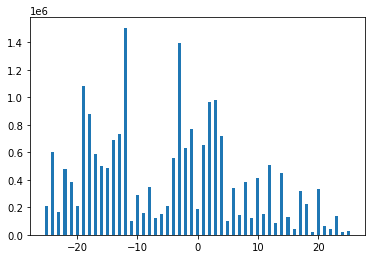

In [12]:
plt.hist(x, bins, histtype='bar', rwidth=0.5)

In [13]:
y/count

-5.135138609603003

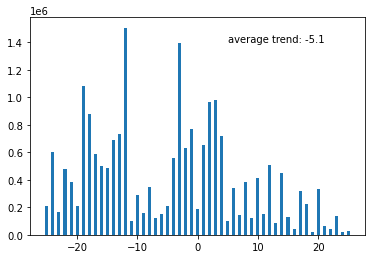

In [14]:
plt.hist(x, bins, histtype='bar', rwidth=0.5)
strr="average trend: "+str(round((y/count),1))
plt.text(5, 1.4*1e6, strr)
fig=plt.gcf()
fig.savefig("povertyTT")
plt.show()



